# Demo for performing cluster-biased PCA

In this notebook we present general functionalities of the `cluster_biased_pca` module.

In [1]:
import PCAfold.train_test_select as tts
import PCAfold.clustering_data as cl
import PCAfold.cluster_biased_pca as cbpca
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Upload the sample data set:
state_space = pd.read_csv('COH2_slf_50000_state_space.csv', sep = ',', header=None).to_numpy()
source_state_space = pd.read_csv('COH2_slf_50000_state_space_sources.csv', sep = ',', header=None).to_numpy()
state_space_names = ['T', 'H2', 'O2', 'O', 'OH', 'H2O', 'H', 'HO2', 'CO', 'CO2', 'HCO']

Let's set some initial parameters:

In [2]:
scal_crit = 'auto'
biasing_option = 2
n_clusters = 4
n_components = 2
save_plots = False
title = 'Demo run'

We should now perform data set clustering that will result in an `idx` matrix that the function `equilibrate_cluster_populations` can use:

In [3]:
scaler = StandardScaler()
conditioning_variable = scaler.fit_transform(state_space)
kmeans = KMeans(n_clusters=n_clusters).fit(conditioning_variable)
idx = kmeans.labels_

### Run cluster equilibration

Notice that with `verbose=True` the function prints out the current number of samples taken from each cluster at each iteration.

In [4]:
(eigenvalues, eigenvectors, pc_scores, pc_sources, idx_train, X_center, X_scale) = cbpca.equilibrate_cluster_populations(state_space, idx, scaling=scal_crit, X_source=source_state_space, n_components=n_components, biasing_option=biasing_option, n_iterations=10, stop_iter=0, verbose=True)

Biasing will be performed with option 2.

At iteration 1 taking samples:
{0: 18486, 1: 15754, 2: 7579, 3: 5305}

At iteration 2 taking samples:
{0: 17022, 1: 14594, 2: 7327, 3: 5305}

At iteration 3 taking samples:
{0: 15558, 1: 13434, 2: 7075, 3: 5305}

At iteration 4 taking samples:
{0: 14094, 1: 12274, 2: 6823, 3: 5305}

At iteration 5 taking samples:
{0: 12630, 1: 11114, 2: 6571, 3: 5305}

At iteration 6 taking samples:
{0: 11166, 1: 9954, 2: 6319, 3: 5305}

At iteration 7 taking samples:
{0: 9702, 1: 8794, 2: 6067, 3: 5305}

At iteration 8 taking samples:
{0: 8238, 1: 7634, 2: 5815, 3: 5305}

At iteration 9 taking samples:
{0: 6774, 1: 6474, 2: 5563, 3: 5305}

At iteration 10 taking samples:
{0: 5305, 1: 5305, 2: 5305, 3: 5305}


***

### Eigenvector weights movement

We are going to plot the first eigenvector (PC-1) weights movement with three variants of normalization. To access the first eigenvector one can simply do:

```python
eigenvectors[:,0,:]
```

similarly, to access the second eigenvector:

```python
eigenvectors[:,1,:]
```

and so on.

Let's start with no normalization `normalize=False`:

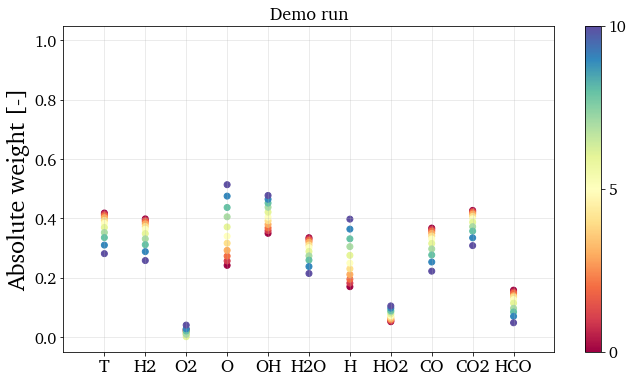

In [5]:
cbpca.analyze_eigenvector_weights_movement(eigenvectors[:,0,:], state_space_names, plot_variables=[], normalize=False, zero_norm=False, title=title, save_plot=save_plots, save_filename='../images/documentation-plot-non-normalized')

Normalization with `normalize=True` and `zero_norm=False`:

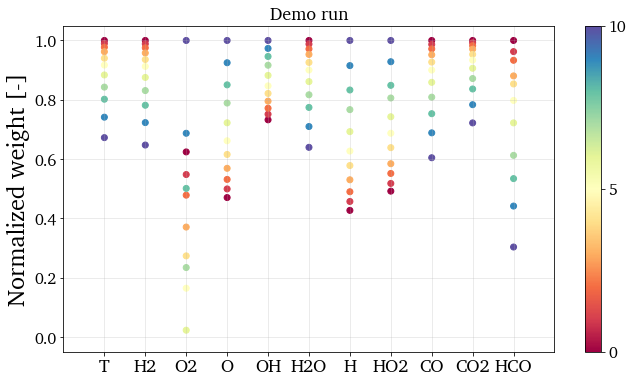

In [6]:
cbpca.analyze_eigenvector_weights_movement(eigenvectors[:,0,:], state_space_names, plot_variables=[], normalize=True, zero_norm=False, title=title, save_plot=save_plots, save_filename='../images/documentation-plot-normalized')

Normalization with `normalize=True` and `zero_norm=True`:

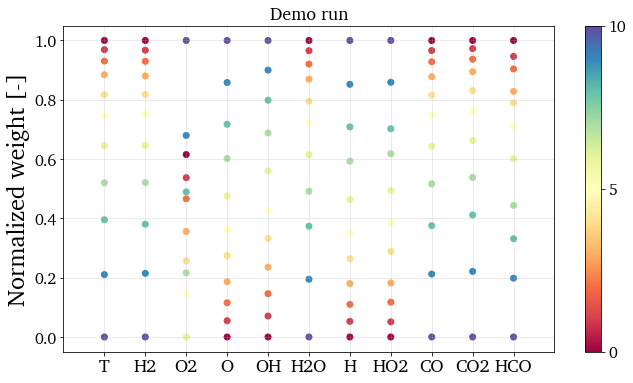

In [7]:
cbpca.analyze_eigenvector_weights_movement(eigenvectors[:,0,:], state_space_names, plot_variables=[], normalize=True, zero_norm=True, title=title, save_plot=save_plots, save_filename='../images/documentation-plot-normalized-to-zero')

Note that in the above example the color bar marks the iteration number and so the $0^{th}$ iteration represents eigenvectors from the initial data set *(as-is)*. The last iteration, in this example $10^{th}$, represents eigenvectors computed on the *equilibrated* data set.

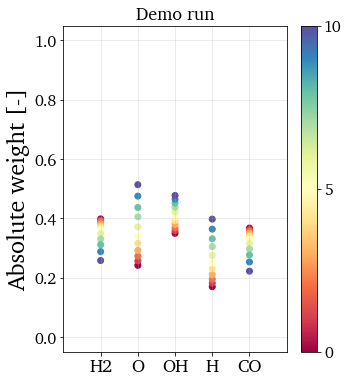

In [8]:
cbpca.analyze_eigenvector_weights_movement(eigenvectors[:,0,:], state_space_names, plot_variables=[1,3,4,6,8], normalize=False, zero_norm=False, title=title, save_plot=save_plots, save_filename='')

***

### Plotting centers movement

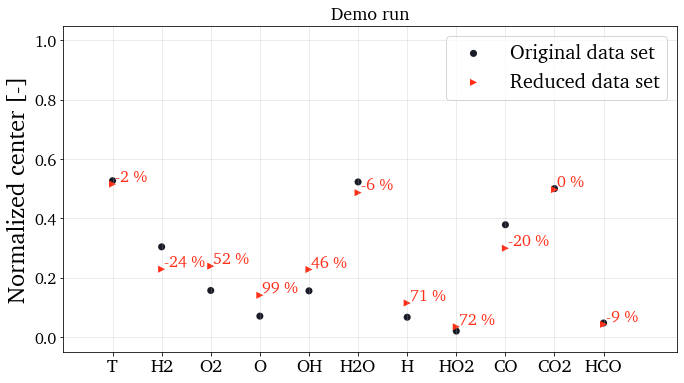

In [9]:
(centers_X, centers_X_r, perc) = cbpca.analyze_centers_movement(state_space, idx_train, variable_names=state_space_names, title=title, save_plot=save_plots, save_filename='')